<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-74-jonern/blob/main/reto2/Actividad_Semana9_Reto_Clasificaciones_Equipo74_A01228409_A01793038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto-> Entrega 2 -> Clasificación-ensambles y presentación ejecutiva**

**Ernesto Enriquez Rubio**

**A01228409**

**Jonathan Garza Bennet**

**A01793038**

**Ciencia y analítica de datos**

**María de la Paz Rico Fernández**

**18 de Noviembre del 2022**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import classification_report

In [ ]:
#Ubicación base de datos original
#input_file_path = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-74-jonern/main/reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'

#Ubicación del conjunto de datos limpio del ejercicio anterior
input_file_path = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-74-jonern/main/Actividades%20Semana%209/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020_clean.csv'

In [ ]:
#Se asigna a un dataframe de pandas con la codificación adecuada
file_encoding = 'unicode_escape'        # set file_encoding to the file encoding (utf-8, latin1, etc.)
#df_original = pd.read_csv(input_file_path, encoding=file_encoding)
df_clean = pd.read_csv(input_file_path, encoding=file_encoding)

In [ ]:
#df_original.describe(include='all')

#Se describe el conjunto de los datos
df_clean.describe(include='all')

,Unnamed: 0,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068.000000,1068,1068,1068,1068,1068,1068,1068,1068.000000,1068.000000,...,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,NaN,1068,1066,13,32,452,273,8,NaN,NaN,...,3,2,3,2,2,2,2,2,2,2
top,NaN,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,NaN,1,2,232,121,27,119,1039,NaN,NaN,...,841,1007,985,941,1066,1053,1067,1056,982,932
mean,533.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,308.449348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,266.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,533.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,800.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df_original.info()

#Se obtiene la información del conjunto de datos limpio
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1068 non-null   int64  
 1   CLAVE                 1068 non-null   object 
 2   SITIO                 1068 non-null   object 
 3   ORGANISMO_DE_CUENCA   1068 non-null   object 
 4   ESTADO                1068 non-null   object 
 5   MUNICIPIO             1068 non-null   object 
 6   ACUIFERO              1068 non-null   object 
 7   SUBTIPO               1068 non-null   object 
 8   LONGITUD              1068 non-null   float64
 9   LATITUD               1068 non-null   float64
 10  PERIODO               1068 non-null   int64  
 11  ALC_mg/L              1068 non-null   float64
 12  CALIDAD_ALC           1068 non-null   object 
 13  CONDUCT_mS/cm         1068 non-null   float64
 14  CALIDAD_CONDUC        1068 non-null   object 
 15  SDT_M_mg/L           

In [ ]:
#df = df_original.copy()

#Se crea una copia del conjunto de datos para trabajar
df = df_clean.copy()

In [ ]:
#df.info()

In [ ]:
#Se obtienen los nombres de las columnas
df.columns

Index(['Unnamed: 0', 'CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO',
       'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO',
       'ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype

In [ ]:
#Se verifica que no haya valores perdidos en el conjunto de datos limpio
df.isnull().sum()

Unnamed: 0              0
CLAVE                   0
SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L 

In [ ]:
#Columnas con información geográfica
X_columnas_latlog = ['LONGITUD', 'LATITUD']

In [ ]:
#Columnas con datos categóricos de cumplimento de parámetros
X_columns_cumple = ['CUMPLE_CON_ALC',
       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG',
       'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']

In [ ]:
#Columnas categóricas con información del tipo de calidad por parámetro
X_columns_calidad = ['CALIDAD_ALC', 
                     'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 
                     'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 
                     'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 
                     'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE']

In [ ]:
#Columnas con mediciones numéricas de parámetros
X_columns_mediciones = ['ALC_mg/L', 'CONDUCT_mS/cm']

In [ ]:
#Columnas con mediciones numéricas de parámetros en rangos
X_columns_mediciones_rangos = ['SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L',
        'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

In [ ]:
#Se realiza resumen estadístico de los datos en las columnas numéricas
df[X_columns_mediciones].describe(include='all')

,ALC_mg/L,CONDUCT_mS/cm
count,1068.000000,1068.000000
mean,235.456117,1143.420974
std,116.775730,1255.024898
min,26.640000,50.400000
25%,163.875000,503.250000
50%,215.527500,818.000000
75%,292.423750,1324.250000
max,1650.000000,18577.000000


In [ ]:
#Se realiza resumen estadístico de los datos en las columnas numéricas en rangos
df[X_columns_mediciones_rangos].describe(include='all')

,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,926,862,890,125,995,209,3,168,61,31,362,615
top,380,<0.2,<20,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
freq,4,162,26,737,65,815,1066,854,968,1038,545,401


In [ ]:
#Función que busca un caracter en los valores de una columna
def remove_char_and_transform_to_float(df, columns, char):

  #Ciclo para las columnas
  for column in columns:

    #Ciclo para los elementos de la columna
    for i in range(0,len(df)):
  
      #Se quita el caracter del número
      rr = df.loc[i, column].replace(char,"")

      #Se asigna de vuelta a la columna
      df.loc[i, column] = rr

  #Se transforma a float64
  df.loc[:,X_columns_mediciones_rangos] = df.loc[:,X_columns_mediciones_rangos].astype(np.float64)

In [ ]:
#Se quitan los rangos y sólo se dejan mediciones
remove_char_and_transform_to_float(df, X_columns_mediciones_rangos, '<')

In [ ]:
#Se describen de nuevo las columnas para verificar que todos los datos sean float
df[X_columns_mediciones_rangos].describe(include='all')

,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,895.747257,1.075600,348.878206,355.490356,4.316397,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387
std,2748.966129,1.924278,360.811346,2052.457014,8.341946,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974
min,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
25%,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
50%,551.400000,0.503500,245.662350,1.100000,2.080766,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960
75%,915.900000,1.139850,454.139700,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380
max,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


In [ ]:
#Columnas numéricas
X_columns_numerical = X_columns_mediciones + X_columns_mediciones_rangos

#Se describe de nuevo con todas las columnas numéricas
df[X_columns_numerical].describe(include='all')

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,235.456117,1143.420974,895.747257,1.075600,348.878206,355.490356,4.316397,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387
std,116.775730,1255.024898,2748.966129,1.924278,360.811346,2052.457014,8.341946,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974
min,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
25%,163.875000,503.250000,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
50%,215.527500,818.000000,551.400000,0.503500,245.662350,1.100000,2.080766,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960
75%,292.423750,1324.250000,915.900000,1.139850,454.139700,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380
max,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


# **Clasificadores Categóricos**

Como el conjunto de datos cuenta con variables numéricas y categóricas, las segundas, se encuentran ligadas a los parámetros de muestreo de calidad del agua, por lo tanto, se encuentran relacionadas. Como primer clasificador, se toman sólo las variables categóricas de cumplimento de los parámetros de calidad del agua como predictores del semáforo. Para poder utilizar un clasificador de este tipo, se necesita primero preprocesar las mediciones de calidad para crear una primer clasificación y posteriormente, estos resultados pueden ser usados para alimentar este tipo de clasificador.

In [ ]:
X_init, y_init = df[X_columns_cumple].copy(), df['SEMAFORO'].copy()

In [ ]:
X_init.isnull().sum()

CUMPLE_CON_ALC          0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CUMPLE_CON_CF           0
CUMPLE_CON_NO3          0
CUMPLE_CON_AS           0
CUMPLE_CON_CD           0
CUMPLE_CON_CR           0
CUMPLE_CON_HG           0
CUMPLE_CON_PB           0
CUMPLE_CON_MN           0
CUMPLE_CON_FE           0
dtype: int64

In [ ]:
y_init.isnull().sum()

0

In [ ]:
ordinal_pipeline=Pipeline(
    steps=[("LE", LabelEncoder())]
)

columnasTransformer = ColumnTransformer(transformers = [('ordpipe', ordinal_pipeline, X_columns_cumple)], 
                                        remainder="passthrough")

In [ ]:
labelEncoder= LabelEncoder()
y_LE = labelEncoder.fit_transform(y_init)
y_LE

array([2, 2, 1, ..., 1, 2, 2])

In [ ]:
dummy_x_init = X_init.copy()

In [ ]:
# Encode Categorical Columns
le = LabelEncoder()
dummy_x_init = dummy_x_init.apply(le.fit_transform)

In [ ]:
print(len(dummy_x_init), len(y_LE))

1068 1068


In [ ]:
#Función para graficar la matriz de confusión
def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  txt = ['Verdadero Amarillo','Falso Rojo','Falso Verde', 'Falso Amarillo', 'Verdadero Rojo', 'Falso Verde', 'Falso Amarillo', 'Falso Rojo', 'Verdadero Verde']
  vf = ['(VA)','(FR)','(FV)', '(FA)', '(VR)', '(FV)', '(FA)', '(FR)', '(VV)']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(3,3)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

In [ ]:
import seaborn as sns

In [ ]:
le = LabelEncoder()
dummy_df = df[['SEMAFORO', 'CUMPLE_CON_ALC',
       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG',
       'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']].copy() 
dummy_df = dummy_df.apply(le.fit_transform)

In [ ]:
dummy_df.head()

,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,2,2,2,2,2,1,2,1,2,1,1,1,1,1,1,1
1,2,2,2,2,2,1,2,1,2,1,1,1,1,1,1,1
2,1,2,2,2,2,0,2,1,2,0,1,1,1,1,1,1
3,2,2,2,2,2,1,2,1,2,1,1,1,1,1,1,1
4,1,2,2,2,2,1,2,1,1,1,1,1,1,1,1,1


In [ ]:
df_clean['SEMAFORO']

0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde
Name: SEMAFORO, Length: 1068, dtype: object

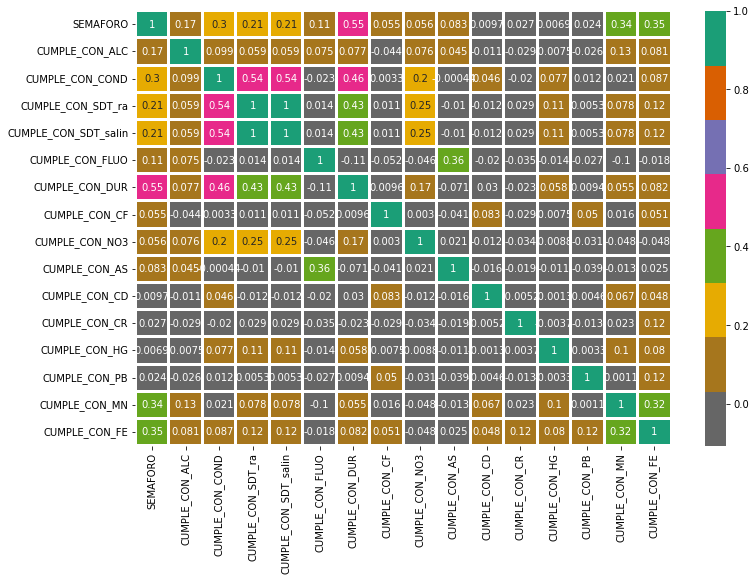

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dummy_df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
X_tv, X_test, y_tv, y_test = train_test_split(dummy_x_init, y_LE, test_size=0.15, random_state=10)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_tv, y_tv)

DecisionTreeClassifier(max_depth=15, random_state=42)

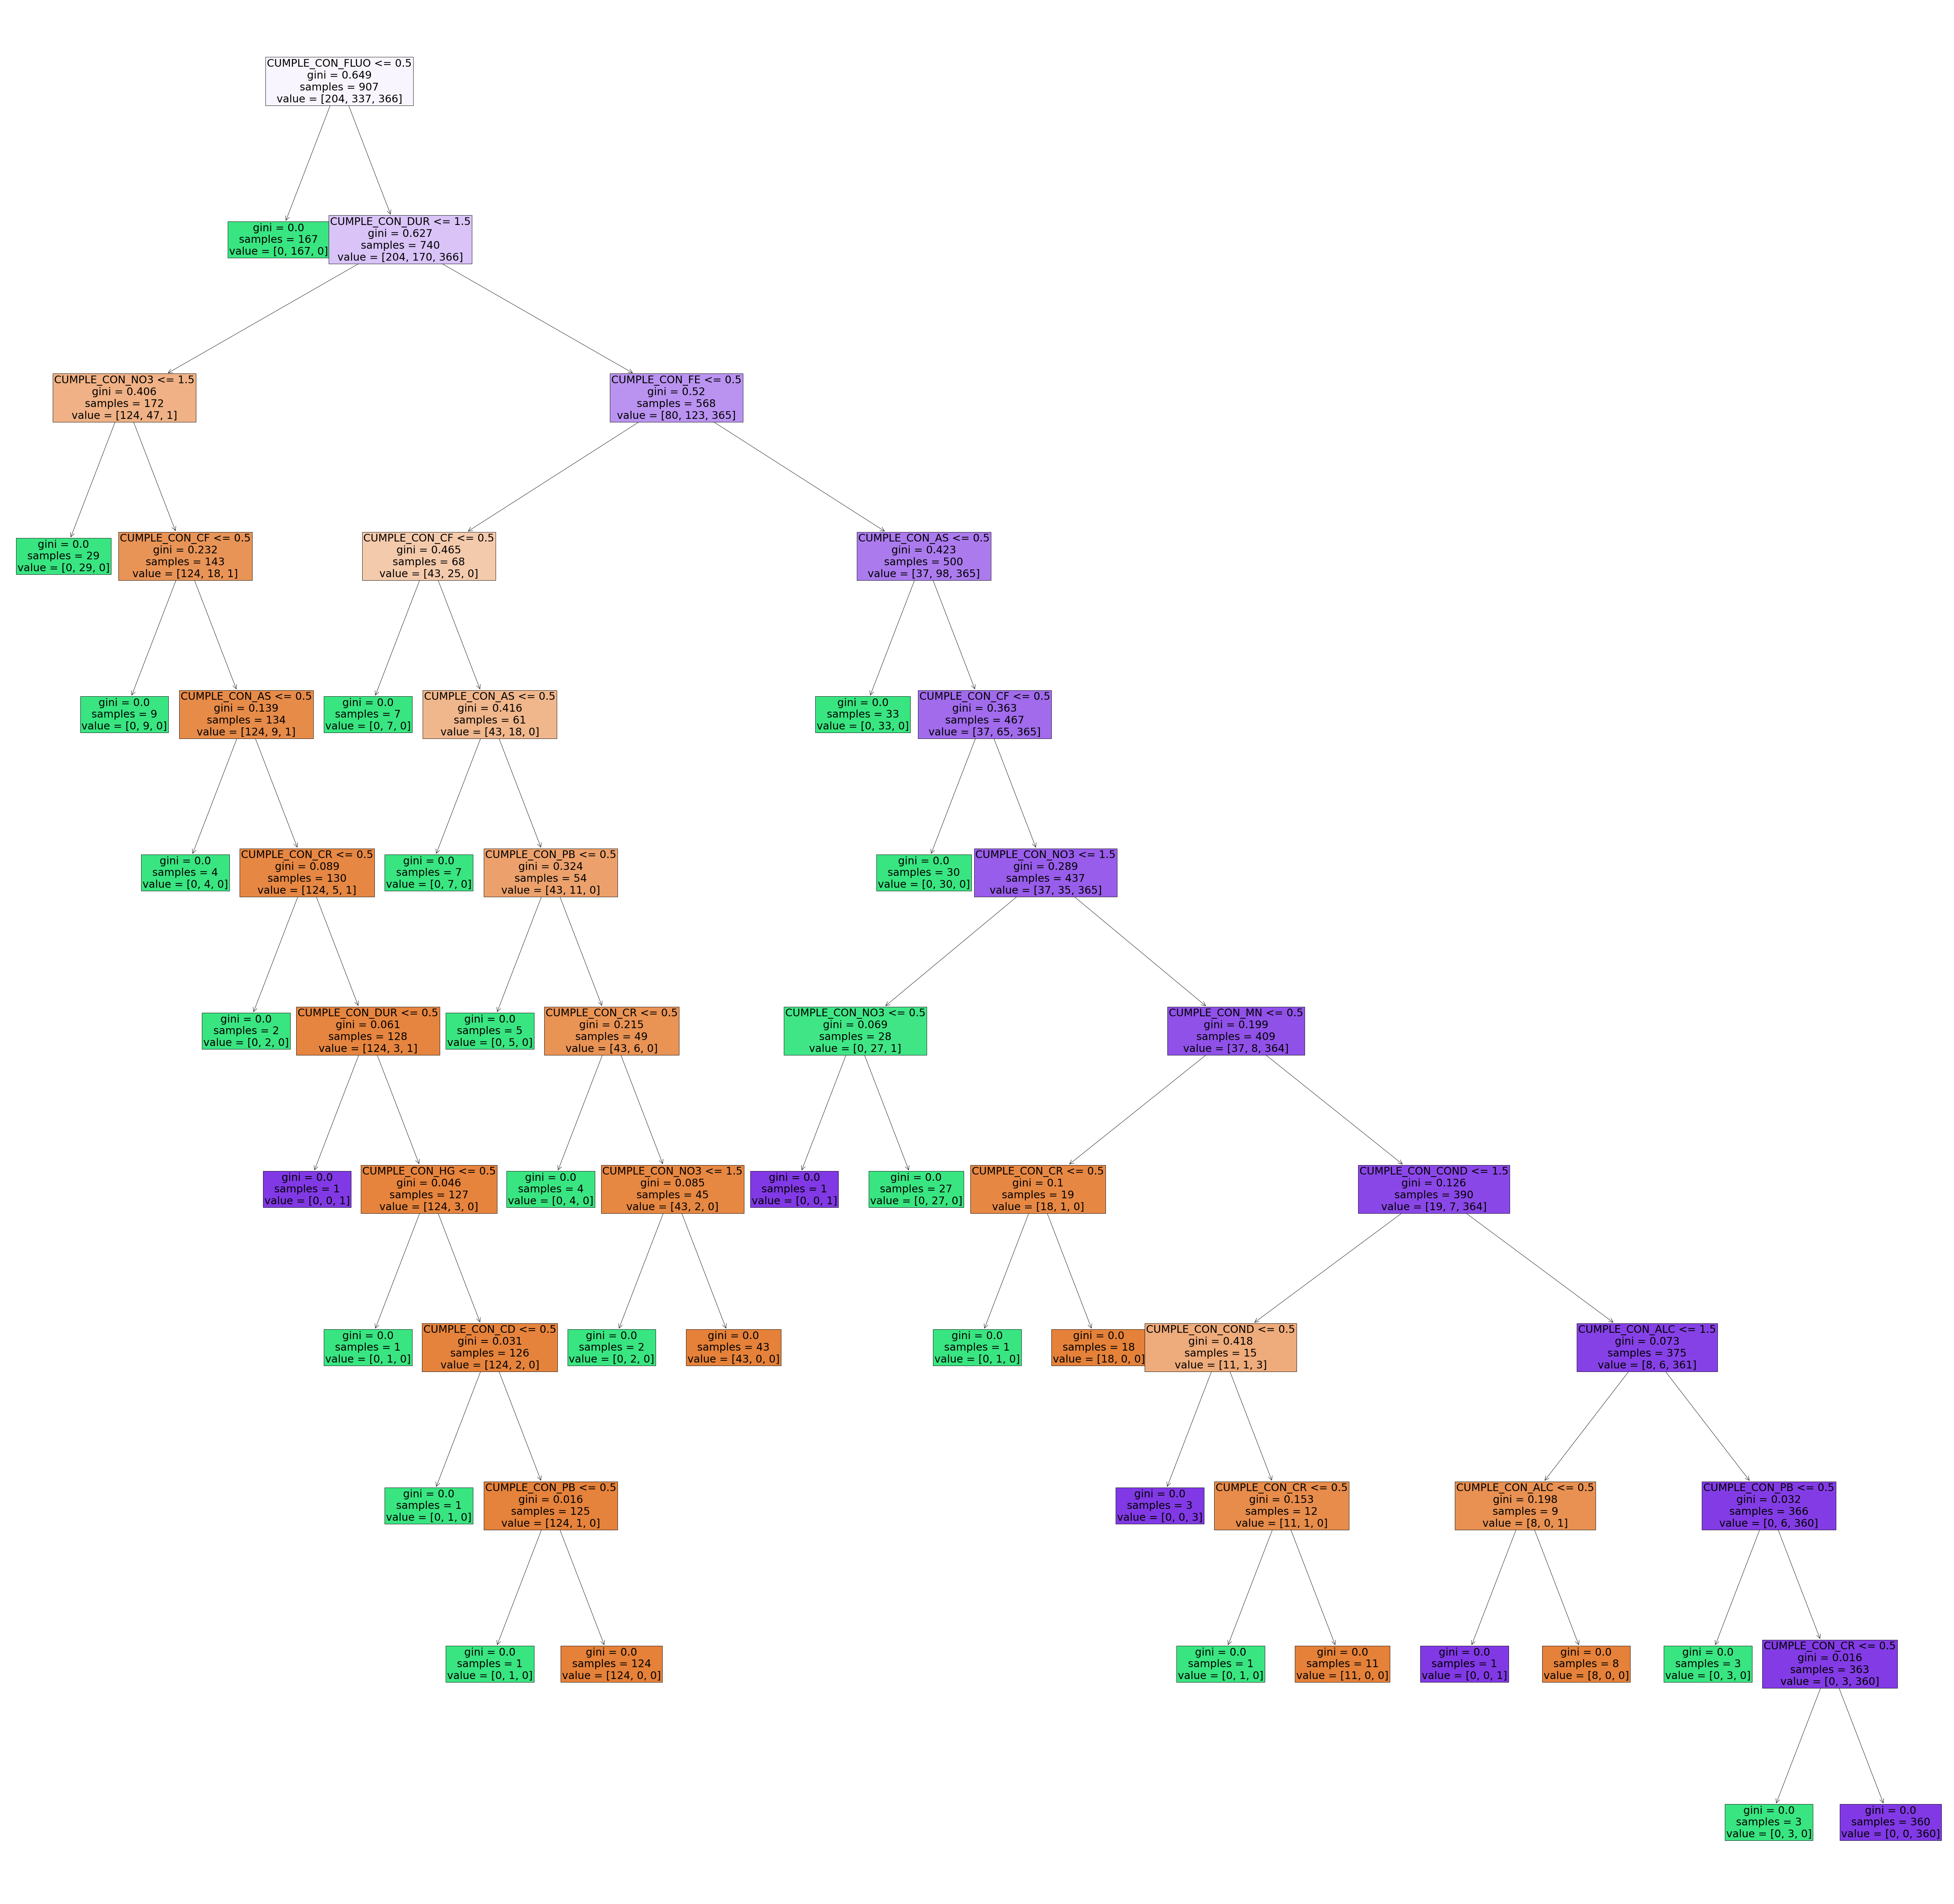

In [ ]:
plt.figure(figsize=(100, 100))
tree.plot_tree(tree_clf, feature_names=dummy_x_init.columns, filled=True, fontsize=30)
plt.show()

# **Feature Importance**

In [ ]:
for score, name in zip(sorted(tree_clf.feature_importances_, reverse=True), X_tv.columns):
    print(round(score*100, 4), '%', name)

21.1701 % CUMPLE_CON_ALC
17.0557 % CUMPLE_CON_COND
14.4559 % CUMPLE_CON_SDT_ra
10.9388 % CUMPLE_CON_SDT_salin
9.6629 % CUMPLE_CON_FLUO
8.8955 % CUMPLE_CON_DUR
5.1742 % CUMPLE_CON_CF
3.4293 % CUMPLE_CON_NO3
3.4194 % CUMPLE_CON_AS
2.6194 % CUMPLE_CON_CD
2.5203 % CUMPLE_CON_CR
0.3319 % CUMPLE_CON_HG
0.3267 % CUMPLE_CON_PB
0.0 % CUMPLE_CON_MN
0.0 % CUMPLE_CON_FE


Se obtuvieron los porcentajes de la importancia de cada sustancia para determinar si la calidad es mala. Se ordenaron de la sustancia con mayor peso a las de menor.

# **Comparar modelos**

In [ ]:
def get_models():
  modelos = list()
  nombres = list()

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier(max_depth=15, random_state=42))
  nombres.append('DT')

  # RF . Bosque Aleatorio
  modelos.append(RandomForestClassifier(max_depth=15, random_state=42))
  nombres.append('RF')

  return modelos, nombres

In [ ]:
modelos, nombres = get_models()  
resultadosLDR = list()   

for i in range(len(modelos)):
  mismetricas={"precission":make_scorer(precision_score, average = 'micro'),"recall":make_scorer(recall_score, average = 'micro')}
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
  resultados = cross_validate(modelos[i], X_tv, y_tv, scoring=mismetricas, cv=kfold, error_score="raise",return_train_score=True)
  resultadosLDR.append(resultados)  
  print("Prueba \n") 
  print('%s:\nmean Precission: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados['test_precission']),
                                                                          np.std(resultados['test_precission']),
                                                                          np.mean(resultados['test_recall']),
                                                                          np.std(resultados['test_recall'])                                                                         
                                                                          ))
  print("Entrenamiento \n") 
  print('%s:\nmean Precission: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados['train_precission']), np.std(resultados['train_precission']), 
                                                                          np.mean(resultados['train_recall']), np.std(resultados['train_recall'])))

Prueba 

DT:
mean Precission: 0.989 (0.0062)
mean Recall: 0.989 (0.0062)

Entrenamiento 

DT:
mean Precission: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)

Prueba 

RF:
mean Precission: 0.988 (0.0058)
mean Recall: 0.988 (0.0058)

Entrenamiento 

RF:
mean Precission: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)



In [ ]:
#Se realizan predicciones
y_score = tree_clf.predict(X_test)

# **Matriz de Confusión Clasificador Categórico**

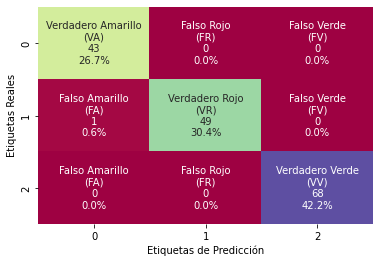

In [ ]:
#Matriz de confusión conjunto de entrenamiento
cm_cat = mi_cm(y_test, y_score)

# **Reporte de Clasificación Clasificador Categórico**

In [ ]:
#Reporte de clasificación para clasificador categórico
target_names = ['Amarillo 0', 'Rojo 1', 'Verde 2']
print(classification_report(y_test, y_score, target_names=target_names))


              precision    recall  f1-score   support

  Amarillo 0       0.98      1.00      0.99        43
      Rojo 1       1.00      0.98      0.99        50
     Verde 2       1.00      1.00      1.00        68

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(
    y_test.ravel(), y_score.ravel(), pos_label=1
)

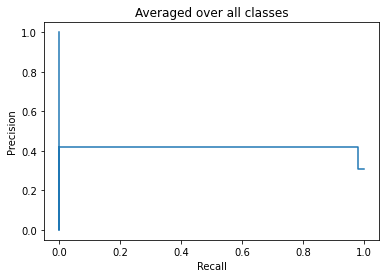

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(
    recall=recall,
    precision=precision
)
display.plot()
_ = display.ax_.set_title("Averaged over all classes")

# **Clasificadores Numéricos**

En este clasificador, se pretenden utilizar variables de muestreo de forma directa con el fin de predecir el semáforo de calidad del agua. La ventaja de este clasificador es que puede utilizar las medidas directas de calidad del agua para predecir el color del semáforo de calidad del agua. El único paso requerido, es remover los caracteres de las medidas que son menores a cierto valor de referencia.

In [ ]:
#Se crea una copia del conjunto de datos para trabajar sólo con datos numéricos
df_numerical = df[['SEMAFORO']+X_columns_numerical].copy()

In [ ]:
#Asigna un número a las variables categóricas
le = LabelEncoder()

#Se aplica la transformación en la variable
df_numerical.loc[:,'SEMAFORO'] = le.fit_transform(df_numerical.loc[:,'SEMAFORO'])

#Se despliega encabezado
df_numerical.head()

,SEMAFORO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,2,229.990,940.0,603.6,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.0015,0.0891
1,2,231.990,608.0,445.4,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.0015,0.0250
2,1,204.920,532.0,342.0,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.0015,0.0250
3,2,327.000,686.0,478.6,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.0015,0.0250
4,1,309.885,1841.0,1179.0,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.0015,0.0250


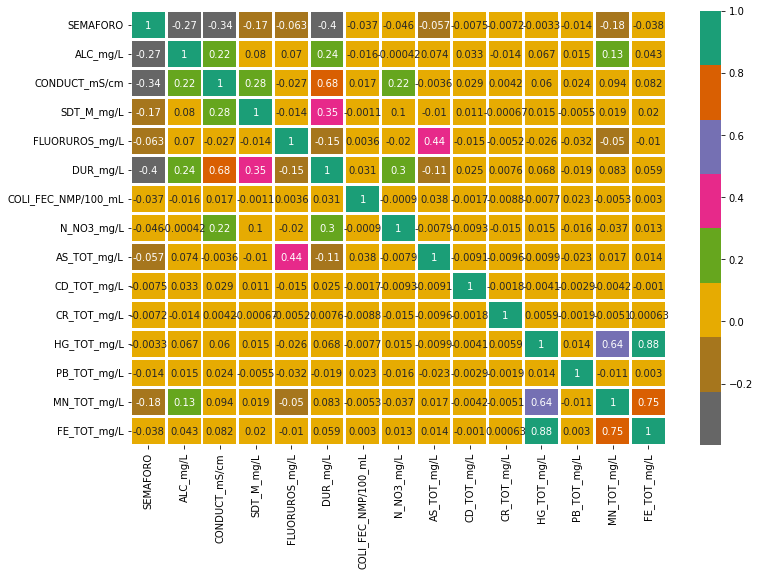

In [ ]:
#Se obtiene matriz de correlación
plt.figure(figsize=(12,8)) 
sns.heatmap(df_numerical.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
#Se definen variables clasificadoras
X_num = df_numerical[X_columns_numerical]

#Se define variable dependiente
y_num = df_numerical['SEMAFORO']

#Se crea conjunto te entrenamiento y validación
X_tv_num, X_test_num, y_tv_num, y_test_num = train_test_split(X_num, y_num, test_size=0.15, random_state=10)

In [ ]:
#Clasificador de árboles de decisión numérico con 15 ramas y semilla 42
tree_clf_num = DecisionTreeClassifier(max_depth=15, random_state=42)

#Se entrena modelo
tree_clf_num.fit(X_tv_num, y_tv_num)

DecisionTreeClassifier(max_depth=15, random_state=42)

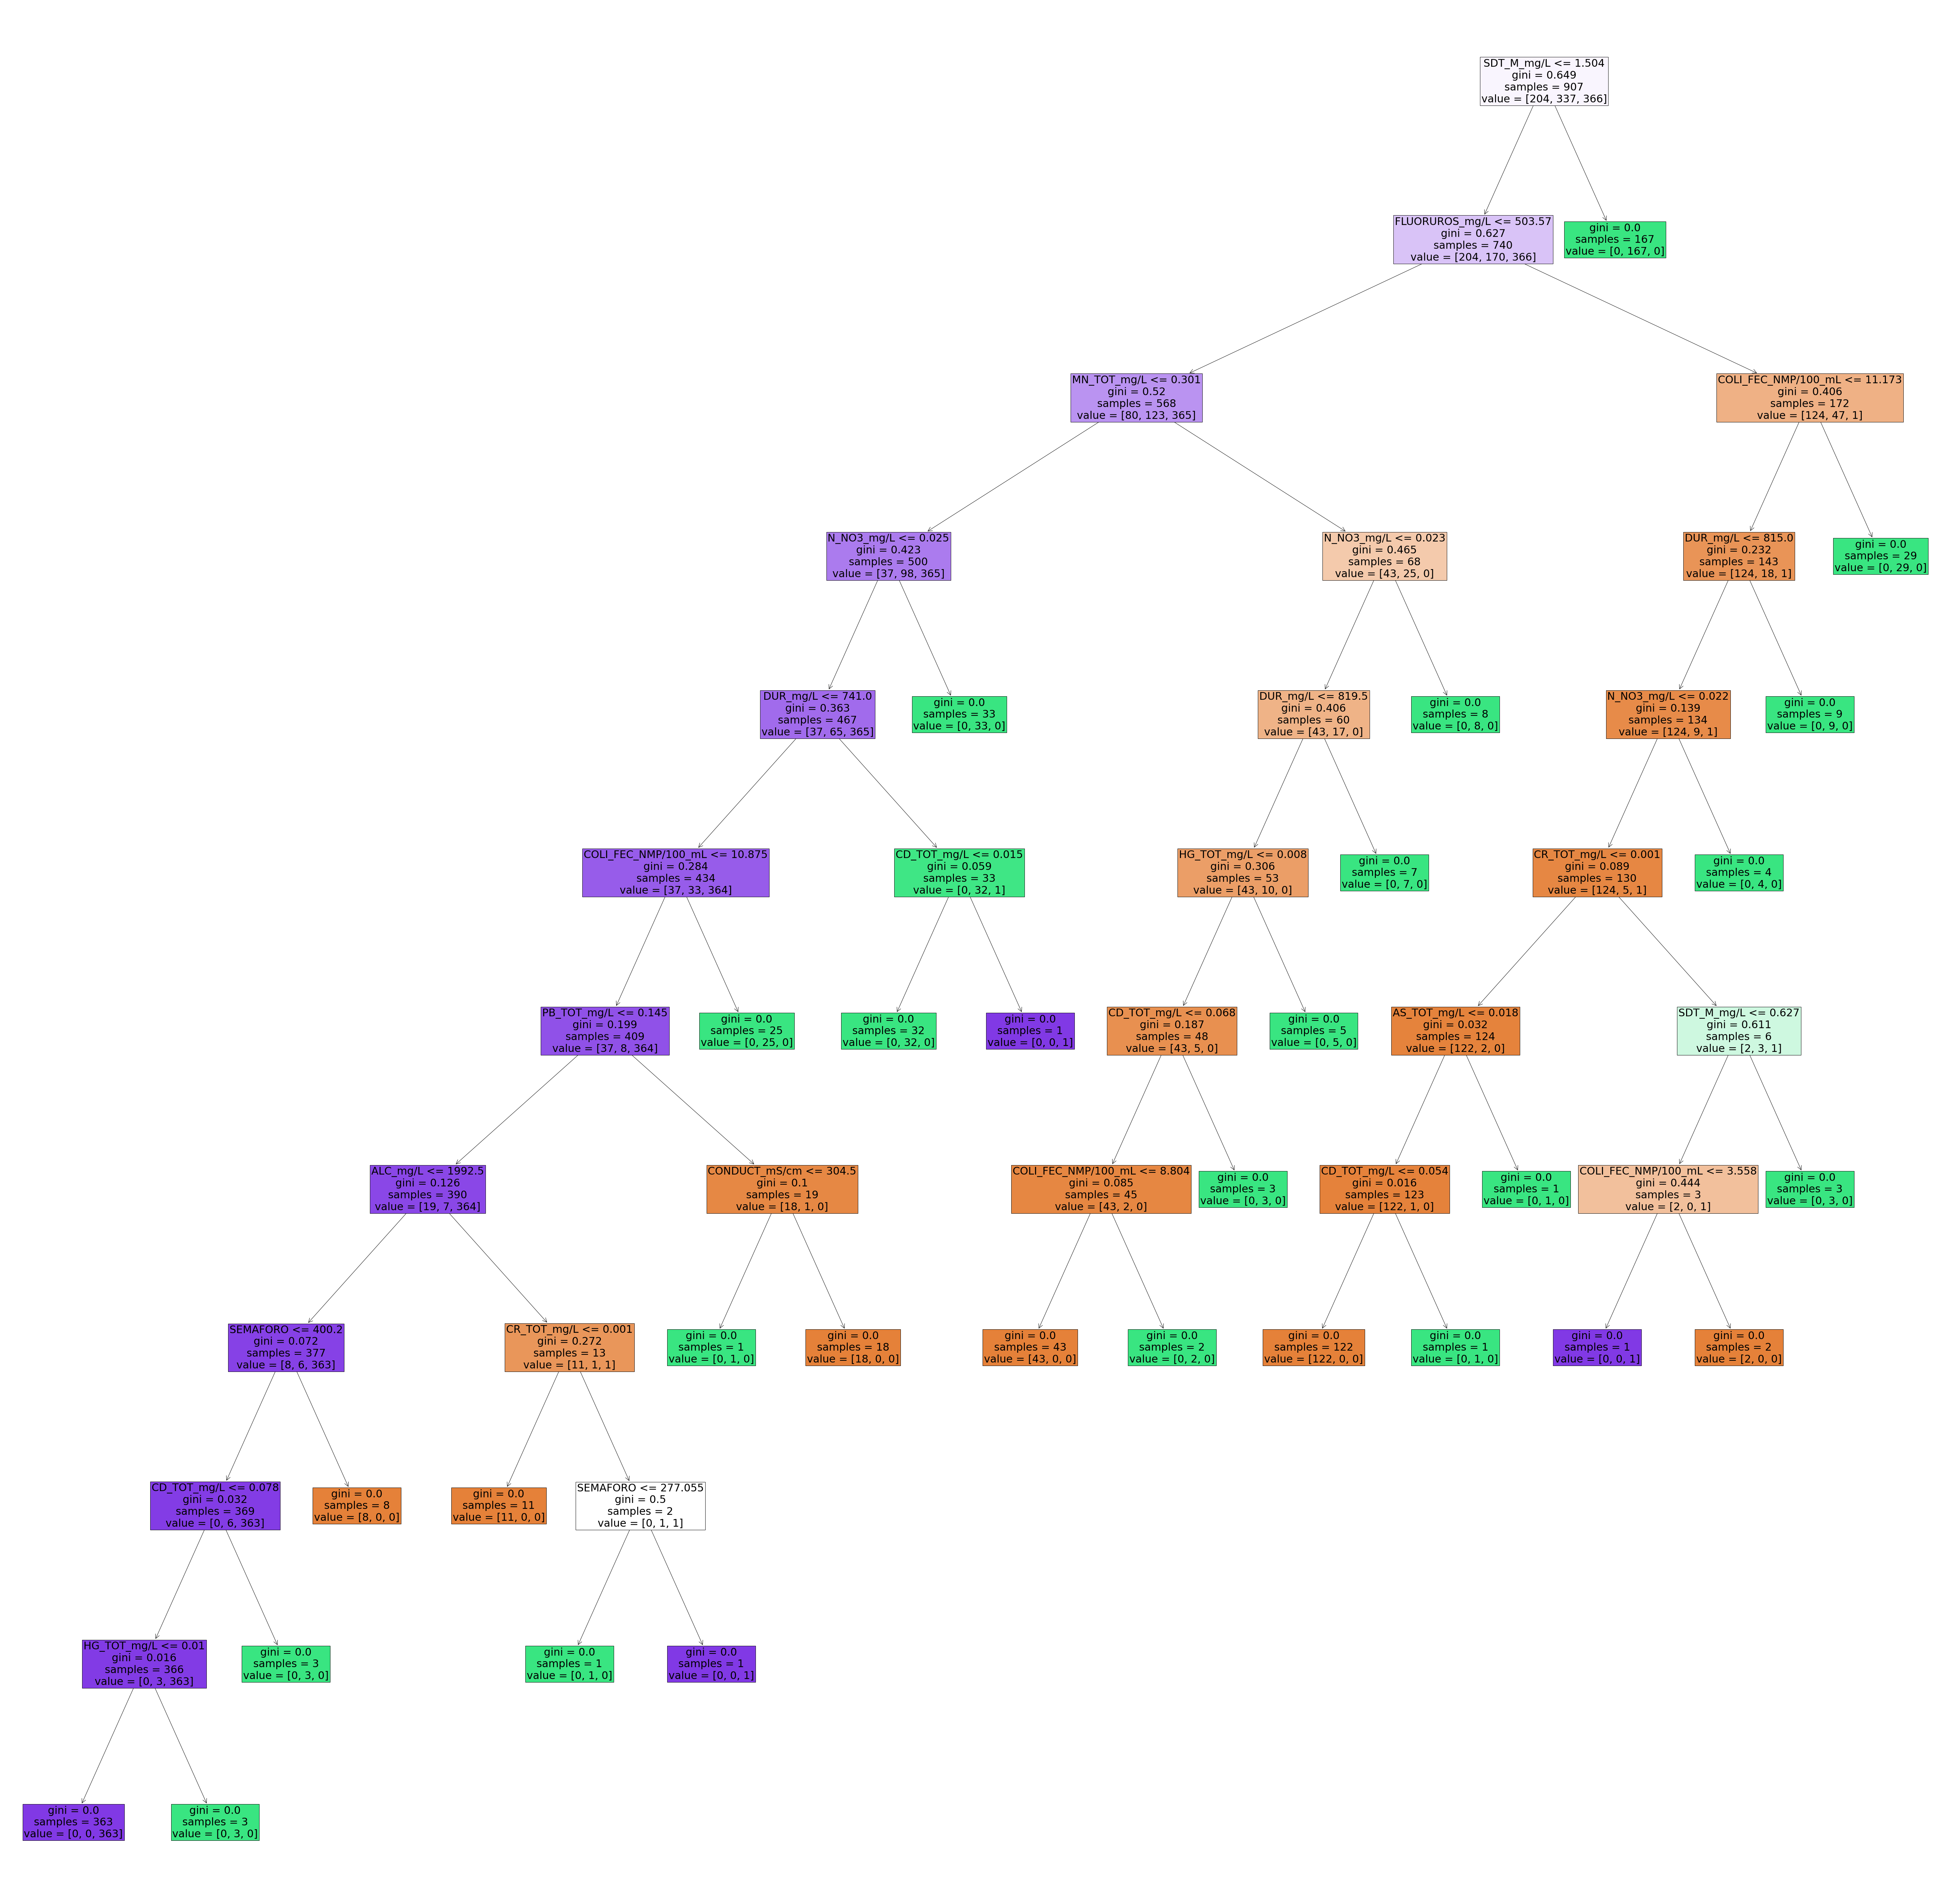

In [ ]:
#Se despliega gráfico de clasificación
plt.figure(figsize=(100, 100))
tree.plot_tree(tree_clf_num, feature_names=df_numerical.columns, filled=True, fontsize=30)
plt.show()

# **Feature Importance**

In [ ]:
for score, name in zip(sorted(tree_clf_num.feature_importances_, reverse=True), X_tv_num.columns):
    print(round(score*100, 4), '%', name)

21.5668 % ALC_mg/L
16.7261 % CONDUCT_mS/cm
14.1462 % SDT_M_mg/L
11.4685 % FLUORUROS_mg/L
9.5596 % DUR_mg/L
8.8955 % COLI_FEC_NMP/100_mL
5.1742 % N_NO3_mg/L
3.1387 % AS_TOT_mg/L
2.7898 % CD_TOT_mg/L
2.5354 % CR_TOT_mg/L
2.2473 % HG_TOT_mg/L
1.0981 % PB_TOT_mg/L
0.3318 % MN_TOT_mg/L
0.3221 % FE_TOT_mg/L


# **Comparar Modelo de Árboles de Decisión y Bosques Aleatorios**

In [ ]:
modelos, nombres = get_models()  
resultadosLDR = list()   

for i in range(len(modelos)):
  mismetricas={"precission":make_scorer(precision_score, average = 'micro'),"recall":make_scorer(recall_score, average = 'micro')}
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
  resultados = cross_validate(modelos[i], X_tv_num, y_tv_num, scoring=mismetricas, cv=kfold, error_score="raise",return_train_score=True)
  resultadosLDR.append(resultados)  
  print("Prueba \n") 
  print('%s:\nmean Precission: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados['test_precission']),
                                                                          np.std(resultados['test_precission']),
                                                                          np.mean(resultados['test_recall']),
                                                                          np.std(resultados['test_recall'])                                                                         
                                                                          ))
  print("Entrenamiento \n") 
  print('%s:\nmean Precission: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados['train_precission']), np.std(resultados['train_precission']), 
                                                                          np.mean(resultados['train_recall']), np.std(resultados['train_recall'])))

Prueba 

DT:
mean Precission: 0.966 (0.0131)
mean Recall: 0.966 (0.0131)

Entrenamiento 

DT:
mean Precission: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)

Prueba 

RF:
mean Precission: 0.958 (0.0153)
mean Recall: 0.958 (0.0153)

Entrenamiento 

RF:
mean Precission: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)



# **Matriz de Confusión Clasificador Numérico**

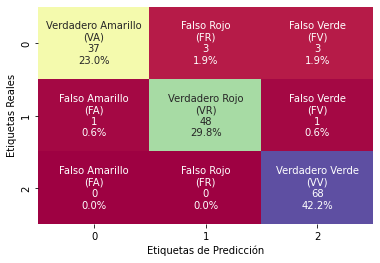

In [ ]:
#Se realizan predicciones
y_score_num = tree_clf_num.predict(X_test_num)

#Matriz de confusión conjunto de entrenamiento
cm_num = mi_cm(y_test_num, y_score_num)

# **Reporte de Clasificación Clasificador Numérico**

In [ ]:
#Reporte de clasificación para clasificador categórico
target_names = ['Amarillo 0', 'Rojo 1', 'Verde 2']
print(classification_report(y_test_num, y_score_num, target_names=target_names))

              precision    recall  f1-score   support

  Amarillo 0       0.97      0.86      0.91        43
      Rojo 1       0.94      0.96      0.95        50
     Verde 2       0.94      1.00      0.97        68

    accuracy                           0.95       161
   macro avg       0.95      0.94      0.95       161
weighted avg       0.95      0.95      0.95       161



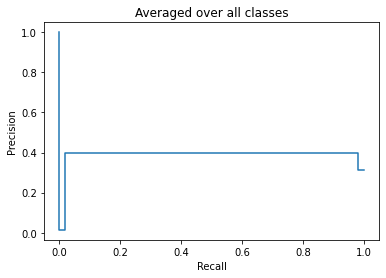

In [ ]:
#Se realiza curva
precision_num, recall_num, _ = precision_recall_curve(
    y_test_num.ravel(), y_score_num.ravel(), pos_label=1
)

#Se crea gráfico
display = PrecisionRecallDisplay(
    recall=recall_num,
    precision=precision_num
)

#Se despliega gráfico
display.plot()
_ = display.ax_.set_title("Averaged over all classes")

# **Conclusiones:**

Los resultados obtenidos con ambos clasificadores tanto numérico como categórico, mostraron resultados ligeramente superiores para el modelo de árboles de decisión, por lo que se determinó como mejor modelo comparado con el de bosques aleatorios.

Posteriormente, se estudiaron los resultados de los modelos de clasificación con variables predictoras categóricas y numéricas. Los resultados de precisión y recall para ambos fueron bastante similares, mostrando un desempeño de clasificación bastante elevado, por encima de 95% de recall y 100% de precisión en ambos. Los resultados se ven reflejados en las matrices de confusión correspondientes, los resultados fuera de la diagonal principal son prácticamente nulos.

Ambas opciones estudiadas en este ejercio resultan en clasificadores robustos para precedir la calidad del agua de forma bastante precisa.